In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import unc_calc_funcs as ucf

In [2]:

temp_table = np.array([0, 20, 35, 50])
temp_table = temp_table + 273.15

Ps_mmHg, Ps_kPa = ucf.calculate_Ps(T_K = temp_table)

print(Ps_mmHg, Ps_kPa)

[ 4.58445395 17.53942105 42.18999885 92.6439359 ] [ 0.61121     2.33839617  5.62486819 12.35150373]


In [3]:
# reference conditions
RH_ref = 60 # % RH
T_C_ref = 20 # Celcius
T_K_ref = T_C_ref+ 273.15

P_kPa_ref = 96 # kPa

#defining the ranges for temp. - min and max values
# standard
RH_range = np.array([45, 75]) # rel. humidity, %
T_C_range = np.array([15, 25]) # deg. Celcius
P_kPa_range = np.array([86, 106]) # kPa

L_range = np.array([0.1, 20]) # meters

# extended
RH_range_ext = np.array([30, 90]) # rel. humidity, %
T_C_range_ext = np.array([-20, 40]) # deg. Celcius
P_kPa_range_ext = np.array([76, 116]) # kPa

# uncertainty in measurement of P, RH and T during calibration process

# unc. in distance measurement for all the range
delta_L = 1e-4 # 0.3 mm
delta_T_C = 0.5 # 0.5 deg Celcius
delta_P_kPa = 1 # kPa
delta_RH = 2.5 # percent

In [4]:
# calculate the dielectric permettivity for reference conditions
eps_ref = ucf.calculate_eps_air(RH = RH_ref,
                                T = T_K_ref,
                                P = ucf.convert_P_kPa_to_P_mmHg(P_kPa = P_kPa_ref))

print(eps_ref[0], eps_ref[1])

8.859686934466997e-12 1.0006423011595886


In [5]:
# calculate the dielectric permettivity for reference conditions
eps_RH_T_P = ucf.calculate_eps_air(RH = 55,
                                T = 30+273.15,
                                P = ucf.convert_P_kPa_to_P_mmHg(P_kPa = 106)
                                )

print(eps_RH_T_P [0], eps_RH_T_P [1])

8.860608043934838e-12 1.0007463343048157


In [6]:
# # now let's vary parameters in defined ranges and plot the surfaces/contours of the values for 

# # Define ranges
# RH_range = np.linspace(45, 75, 11)  # Relative Humidity (%)
# T_C_range = np.linspace(15, 25, 11)  # Temperature (°C)
# P_kPa_range = np.linspace(86, 106, 11)  # Pressure (kPa)

# # Convert ranges to grids
# RH_grid, T_C_grid, P_kPa_grid = np.meshgrid(RH_range, T_C_range, P_kPa_range)

# # Initialize arrays for results
# eps_abs_grid = np.zeros_like(RH_grid)
# eps_rel_grid = np.zeros_like(RH_grid)

# # Reference conditions
# RH_ref = 60  # % RH
# T_K_ref = 20 + 273.15  # K
# P_kPa_ref = 96  # kPa

# eps_ref_abs, eps_ref_rel = ucf.calculate_eps_air(RH_ref, T_K_ref, P_kPa_ref)

# # Calculate epsilon values for each grid point
# for i in range(RH_grid.shape[0]):
#     for j in range(RH_grid.shape[1]):
#         for k in range(RH_grid.shape[2]):
#             RH = RH_grid[i, j, k]
#             T_K = T_C_grid[i, j, k] + 273.15
#             P = P_kPa_grid[i, j, k]
#             eps_abs, eps_rel = ucf.calculate_eps_air(RH, T_K, P)
#             eps_abs_grid[i, j, k] = eps_abs
#             eps_rel_grid[i, j, k] = eps_rel

# # Calculate delta_epsilon relative to reference
# delta_eps_abs_grid = eps_abs_grid - eps_ref_abs
# delta_eps_rel_grid = eps_rel_grid - eps_ref_rel

# # Visualize results
# def plot_contours(X, Y, Z, xlabel, ylabel, title):
#     plt.figure(figsize=(10, 6))
#     cp = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
#     plt.colorbar(cp, label='Δε_air (relative)')
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)
#     plt.title(title)
#     plt.show()

# # Example: Plot contours for a fixed P_kPa (e.g., 96 kPa)
# fixed_P_idx = np.argmin(np.abs(P_kPa_range - 96))
# plot_contours(
#     RH_range, T_C_range,
#     delta_eps_rel_grid[:, :, fixed_P_idx],
#     xlabel='Relative Humidity (%)',
#     ylabel='Temperature (°C)',
#     title='Δε_air at P = 96 kPa'
# )

# # Example: Plot contours for a fixed T_C (e.g., 20°C)
# fixed_T_idx = np.argmin(np.abs(T_C_range - 20))
# plot_contours(
#     RH_range, P_kPa_range,
#     delta_eps_rel_grid[fixed_T_idx, :, :],
#     xlabel='Relative Humidity (%)',
#     ylabel='Pressure (kPa)',
#     title=r'$\varepsilon_\text{air}$ at T = 20°C'
# )

In [7]:
# Example Inputs
RH = 60  # %RH
T = 293.15  # K (20°C)
P = 760  # mmHg

delta_RH = 2.5  # %RH
delta_T = 0.5  # K
delta_P = 1 * 7.50062  # 1 kPa =>  mmHg

# Calculate ε_air and its uncertainty
eps_air_rel, delta_eps_air_rel = ucf.calculate_eps_air_with_uncertainty(RH, T, P, delta_RH, delta_T, delta_P)

print(f"ε_air: {eps_air_rel:.6e} ")
print(f"Δε_air: {delta_eps_air_rel:.6e} ")

ε_air: 1.000671e+00 
Δε_air: 7.875025e-06 


In [ ]:
# Define ranges and grids for calculations

RH_range = np.linspace(45, 75, 11)  # Relative Humidity (%)
T_C_range = np.linspace(15, 25, 11)  # Temperature (°C)
T_K_range = T_C_range + 273.15  # Convert to Temperature (K)
P_kPa_range = np.linspace(86, 106, 11)  # Pressure (kPa)
P_mmHg_range = P_kPa_range * 7.50062  # Convert kPa to mmHg

# Convert ranges to grids
RH_grid, T_K_grid, P_mmHg_grid = np.meshgrid(RH_range, T_K_range, P_mmHg_range)

# Initialize arrays for results
eps_rel_grid = np.zeros_like(RH_grid)
delta_eps_rel_grid = np.zeros_like(RH_grid)

# Reference conditions - point
RH_ref = 60  # % RH
T_K_ref = 293.15  # K (20°C)
P_mmHg_ref = 96 * 7.50062  # mmHg

# Calculate relative permittivity and uncertainty on the grid
for i in range(RH_grid.shape[0]):
    for j in range(RH_grid.shape[1]):
        for k in range(RH_grid.shape[2]):
            RH = RH_grid[i, j, k]
            T = T_K_grid[i, j, k]
            P = P_mmHg_grid[i, j, k]

            # Calculate relative permittivity
            eps_rel, delta_eps_rel = ucf.calculate_eps_air_with_uncertainty(RH, T, P, delta_RH, delta_T, delta_P)
            eps_rel_grid[i, j, k] = eps_rel
            delta_eps_rel_grid[i, j, k] = delta_eps_rel


In [9]:
eps_rel_grid.shape, delta_eps_rel_grid.shape

((11, 11, 11), (11, 11, 11))

In [18]:
print("Min:", np.min(eps_rel_grid[:, :, 0]))
print("Max:", np.max(eps_rel_grid[:, :, 0]))

Min: 1.0005425617078942
Max: 1.0006595561495648


In [17]:
eps_rel_grid

array([[[1.00054256, 1.00055355, 1.00056453, ..., 1.00063044,
         1.00064142, 1.00065241],
        [1.00054724, 1.00055823, 1.00056921, ..., 1.00063512,
         1.00064611, 1.00065709],
        [1.00055192, 1.00056291, 1.00057389, ..., 1.0006398 ,
         1.00065079, 1.00066177],
        ...,
        [1.00058001, 1.000591  , 1.00060198, ..., 1.00066789,
         1.00067887, 1.00068986],
        [1.00058469, 1.00059568, 1.00060666, ..., 1.00067257,
         1.00068355, 1.00069454],
        [1.00058937, 1.00060036, 1.00061134, ..., 1.00067725,
         1.00068824, 1.00069922]],

       [[1.00054506, 1.00055601, 1.00056695, ..., 1.00063263,
         1.00064358, 1.00065453],
        [1.00055002, 1.00056096, 1.00057191, ..., 1.00063759,
         1.00064854, 1.00065949],
        [1.00055497, 1.00056592, 1.00057687, ..., 1.00064255,
         1.00065349, 1.00066444],
        ...,
        [1.00058471, 1.00059566, 1.00060661, ..., 1.00067229,
         1.00068323, 1.00069418],
        [1.0

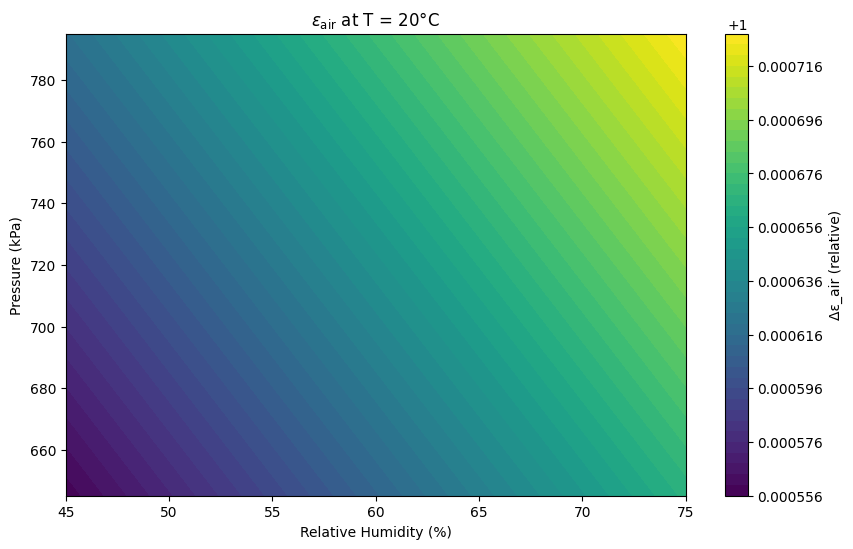

In [29]:

# Visualize results
def plot_contours(X, Y, Z, xlabel, ylabel, title):
    plt.figure(figsize=(10, 6))
    cp = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
    plt.colorbar(cp, label='Δε_air (relative)')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

# Example: Plot contours for a fixed P_kPa (e.g., 96 kPa)
fixed_P_idx = np.argmin(np.abs(P_kPa_range - 96))

# Example: Plot contours for a fixed T_C (e.g., 20°C)
fixed_T_idx = np.argmin(np.abs(T_C_range - 20))

plot_contours(
    RH_range, P_mmHg_range,
    eps_rel_grid[fixed_T_idx, :, :],
    xlabel='Relative Humidity (%)',
    ylabel='Pressure (kPa)',
    title=r'$\varepsilon_\text{air}$ at T = 20°C'
)

Grid Shapes: (11, 11) (11, 11) (11, 11)
eps_rel_grid Min/Max: 1.0005425617078942 1.0006595561495648


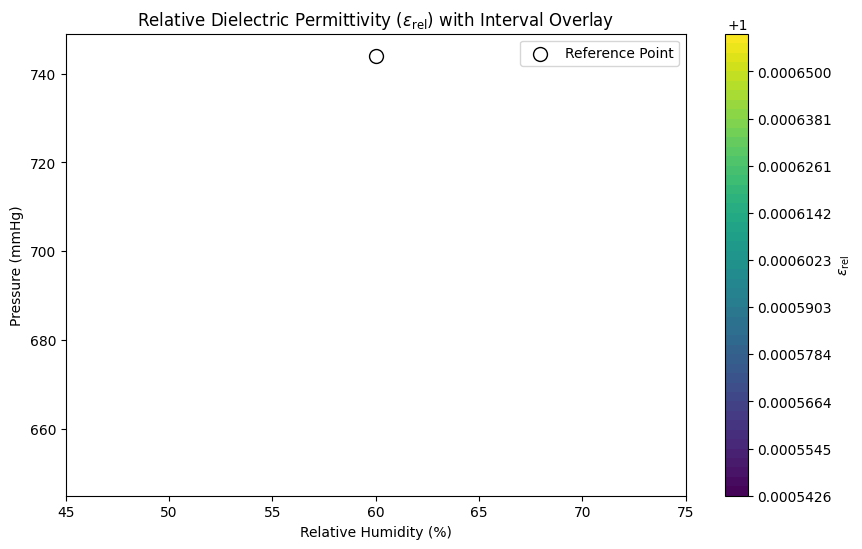

In [23]:
# plotting for ref. conditions

def visualize_eps_with_interval(
    RH_grid, P_mmHg_grid, eps_rel_grid, delta_eps_rel_grid,
    RH_calc, P_calc, eps_calc, delta_eps_calc
):
    """
    Visualize relative permittivity with an overlay of the interval region for a given point.
    """

    # Debugging: Check shapes and data
    print("Grid Shapes:", RH_grid[:, :, 0].shape, P_mmHg_grid[:, :, 0].shape, eps_rel_grid[:, :, 0].shape)
    print("eps_rel_grid Min/Max:", np.min(eps_rel_grid[:, :, 0]), np.max(eps_rel_grid[:, :, 0]))

    # Compute the interval region
    lower_bound = eps_calc - delta_eps_calc
    upper_bound = eps_calc + delta_eps_calc

    # Plot the relative permittivity as a colorbar
    levels = np.linspace(np.min(eps_rel_grid[:, :, 0]), np.max(eps_rel_grid[:, :, 0]), 50)
    plt.figure(figsize=(10, 6))
    cp = plt.contourf(RH_grid[:, :, 0], P_mmHg_grid[:, :, 0], eps_rel_grid[:, :, 0], levels=levels, cmap='viridis')
    plt.colorbar(cp, label=r'$\varepsilon_{\text{rel}}$')

    # Overlay the reference point
    plt.scatter(RH_calc, P_calc, color='white', edgecolor='black', s=100, label='Reference Point')

    # Titles and labels
    plt.xlabel('Relative Humidity (%)')
    plt.ylabel('Pressure (mmHg)')
    plt.title(
        rf'Relative Dielectric Permittivity ($\varepsilon_{{\text{{rel}}}}$) with Interval Overlay'
    )
    plt.legend()
    plt.show()


# Assuming we have already calculated the necessary grids and values
RH_calc = 60  # Reference RH (%)
P_calc = 744  # Reference Pressure (mmHg)
eps_calc = 1.00067  # Example calculated relative permittivity
delta_eps_calc = 7.874e-6  # Example uncertainty

# Visualize
visualize_eps_with_interval(
    RH_grid, P_mmHg_grid, eps_rel_grid, delta_eps_rel_grid,
    RH_calc, P_calc, eps_calc, delta_eps_calc
)
